In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
file_path = r"C:\Users\prana\Desktop\Data Science\NLP\ANN\BankCustomerChurnScaled.csv"
df = pd.read_csv(file_path)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


## Train Test Split

In [3]:
X = df.drop('Exited', axis=1)
y = df['Exited']

#test size 20% and train size 80%

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

 ### Model Evaluation Metrics
#### For performance assessment of the chosen models, various metrics are used:

##### Feature weights: 
Indicates the top features used by the model to generate the predictions

##### Confusion matrix: 
Shows a grid of true and false predictions compared to the actual values

##### Accuracy score: 
Shows the overall accuracy of the model for training set and test set

##### ROC Curve: 
Shows the diagnostic ability of a model by bringing together true positive rate (TPR) and false positive rate (FPR) for different thresholds of class predictions (e.g. thresholds of 10%, 50% or 90% resulting to a prediction of churn)

##### AUC (for ROC): 
Measures the overall separability between classes of the model related to the ROC curve

##### Precision-Recall-Curve: 
Shows the diagnostic ability by comparing false positive rate (FPR) and false negative rate (FNR) for different thresholds of class predictions. It is suitable for data sets with high class imbalances (negative values overrepresented) as it focuses on precision and recall, which are not dependent on the number of true negatives and thereby excludes the imbalance

##### F1 Score: 
Builds the harmonic mean of precision and recall and thereby measures the compromise between both.

##### AUC (for PRC): 
Measures the overall separability between classes of the model related to the Precision-Recall curve

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,precision_recall_curve,auc,f1_score,precision_score,recall_score


In [5]:
#Define a function that plots the feature weights for a classifier. 

def feature_weights (X_df, classifier, classifier_name): 
    weights = pd.Series (classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6)) 
    plt.tick_params (labelsize=10)
    #plt.xlabel(fontsize=10) 
    plt.title(f'{classifier_name} - Top 10 Features') 
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params (labelsize=10) 
    #plt.xlabel(fontsize=10) 
    plt.title(f' {classifier_name} - Bottom 10 Features') 
    bottom_weights_selected.plot(kind="bar")

    return print("")



In [6]:
# Define a function that plots the confusion matrix for a classifier and the train and test accuracy 
def confusion_matrix_plot(x_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize-(7, 6))

    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cap=plt.co.Blues, normalize="true", ax=ax) 
    ax.set_title(f'{classifier_name}- Confusion Matrix (norm.)') 
    plt.show()

    print (f'Accuracy Score Test: {accuracy_score (y_test, y_pred)}') 
    print (f'Accuracy Score Train: {classifier.score(x_train, y_train)} (as comparison)') 
    return print("")



In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_xticklabels(["No Churn", "Churn"])
    ax.set_yticklabels(["No Churn", "Churn"])
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
    sns.heatmap(cm_normalized, annot=True, cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_xticklabels(["No Churn", "Churn"])
    ax.set_yticklabels(["No Churn", "Churn"])
    ax.set_title(f'{classifier_name} - Confusion Matrix (Normalized)')
    plt.show()

    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = classifier.score(X_train, y_train)
    print(f'Accuracy Score Test: {accuracy_test}')
    print(f'Accuracy Score Train: {accuracy_train} (as comparison)')
    print("")


In [20]:
#Define a function that plots the ROC curve and the AUC score 

def roc_curve_auc_score (X_test, y_test, y_pred_probabilities, classifier_name):

    y_pred_prob =  y_pred_probabilities[:,1] 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot([0, 1], [0, 1], 'k--')

    plt.plot(fpr, tpr, label=f'{classifier_name}')

    plt.xlabel("False Positive Rate") 
    plt.ylabel("True Positive Rate")

    plt.title(f'{classifier_name}- ROC Curve')
    plt.show()

    return print(f'AUC Score (ROC): {roc_auc_score (y_test, y_pred_prob)}\n')



In [21]:
#Define a function that plots the precision-recott-curve and the F1 score and AUC score 

def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):

    y_pred_prob = y_pred_probabilities[:,1]

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    plt.plot(recall, precision, label = f'{classifier_name}')

    plt.xlabel("Recall")

    plt.ylabel("Precision")

    plt.title(f'{classifier_name} - Precision-Recall Curve')

    plt.show()

    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)

    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

### Model Selection, Training, Prediction and Assessment

###### In the beginning we will test out several models and measure their performance by several metrics. Those models will be optimized in a later step by tuning their hyperparameters. The models used include:

K Nearest Neighbors — fast, simple and instance-based

Logistic Regression — fast and linear model

Random Forest — slower but accurate ensemble model based on decision trees

Support Vector Machines — slower but accurate model used here in the non-linear form

## KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)

y_pred_knn_prob = knn.predict_proba(X_test)

In [11]:
knn

KNeighborsClassifier()

In [12]:
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
y_pred_knn_prob

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ]])

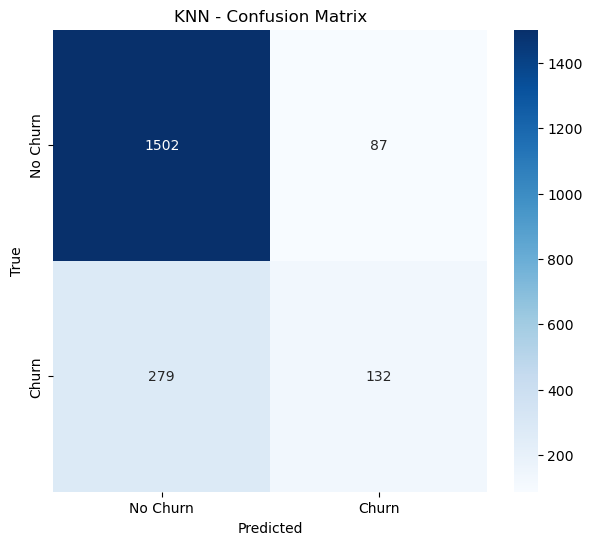

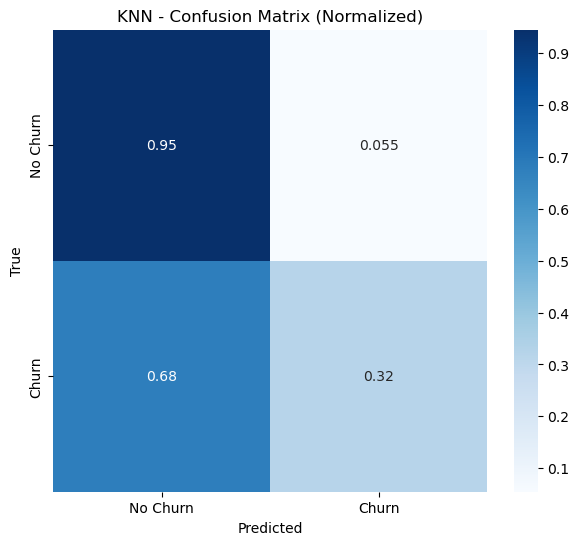

Accuracy Score Test: 0.817
Accuracy Score Train: 0.861375 (as comparison)



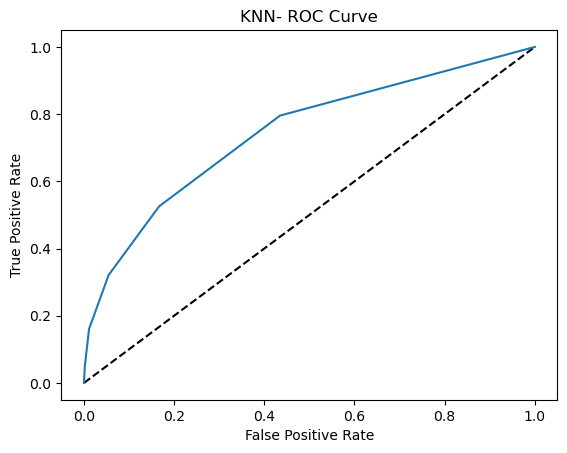

AUC Score (ROC): 0.7434001093282743



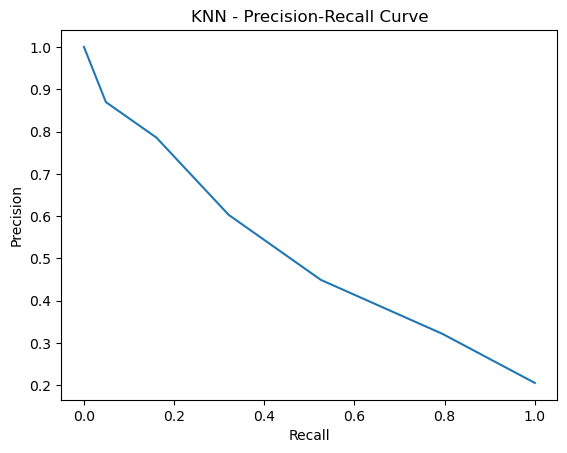

F1 Score: 0.419047619047619 
AUC Score (PR): 0.5149262230869344



In [14]:
confusion_matrix_plot(X_train,y_train,X_test,y_test,knn,y_pred_knn,'KNN')

roc_curve_auc_score (X_test, y_test, y_pred_knn_prob, 'KNN')

precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')



## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000)

logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [16]:
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict(X_test)

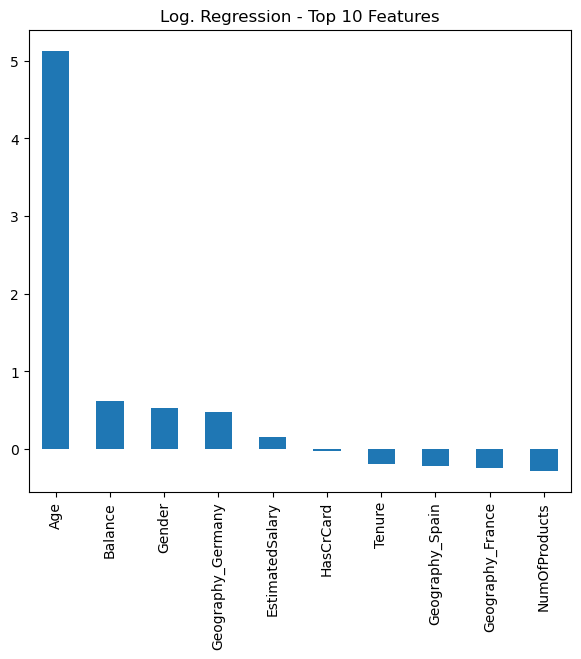

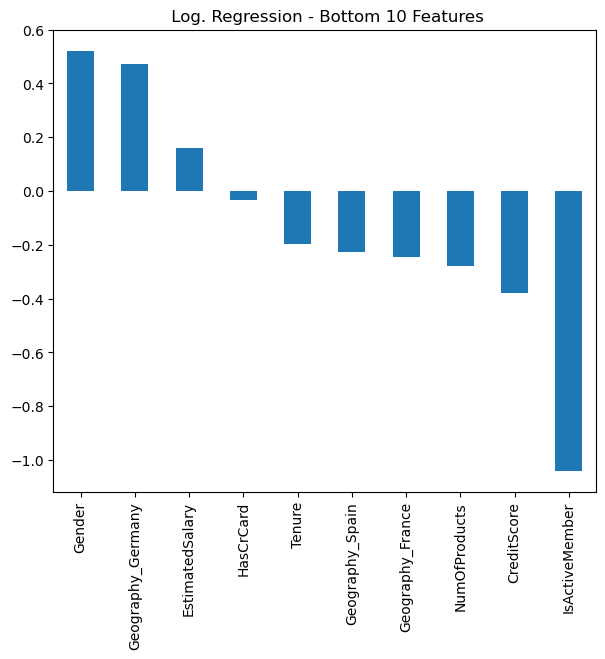

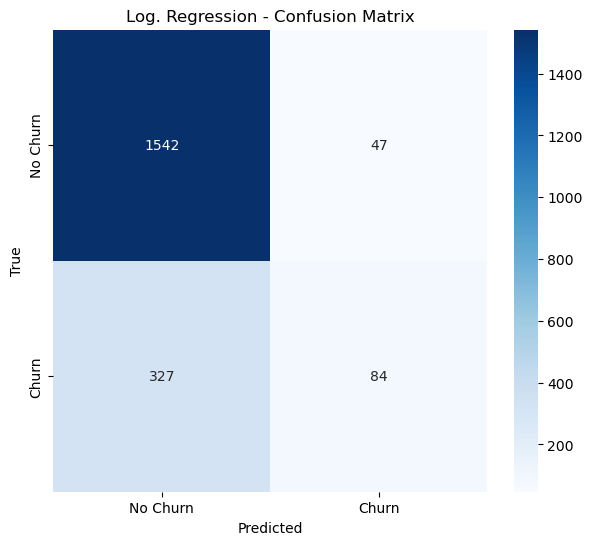

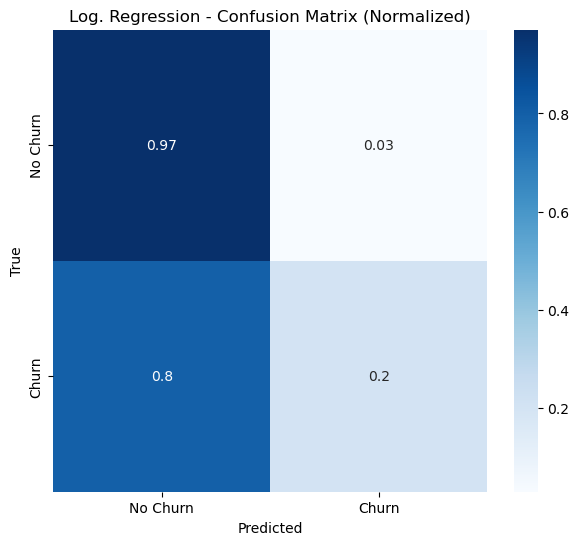

Accuracy Score Test: 0.813
Accuracy Score Train: 0.812125 (as comparison)



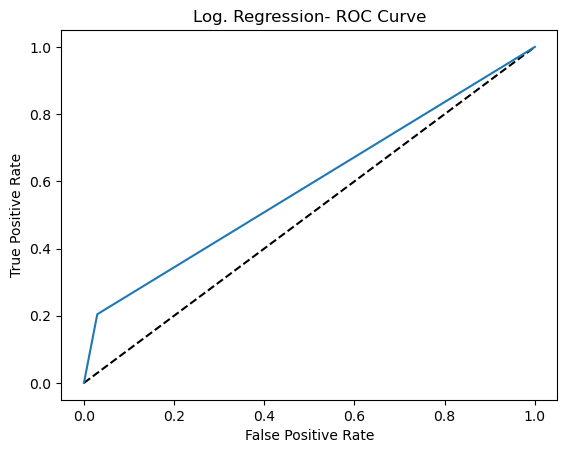

AUC Score (ROC): 0.5874006054397707



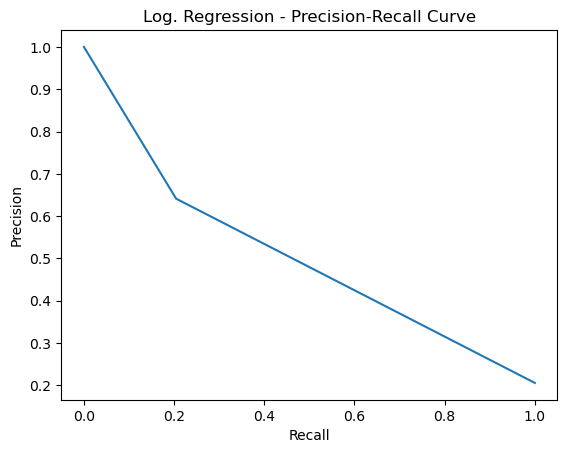

F1 Score: 0.3099630996309963 
AUC Score (PR): 0.5045504680447985



In [19]:
#change y_pred_prob = y_pred_probabilities #[:,1]

feature_weights(X,logreg,'Log. Regression') 

confusion_matrix_plot(X_train,y_train,X_test,y_test,logreg,y_pred_logreg,'Log. Regression')

roc_curve_auc_score (X_test, y_test, y_pred_logreg_prob, 'Log. Regression')

precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

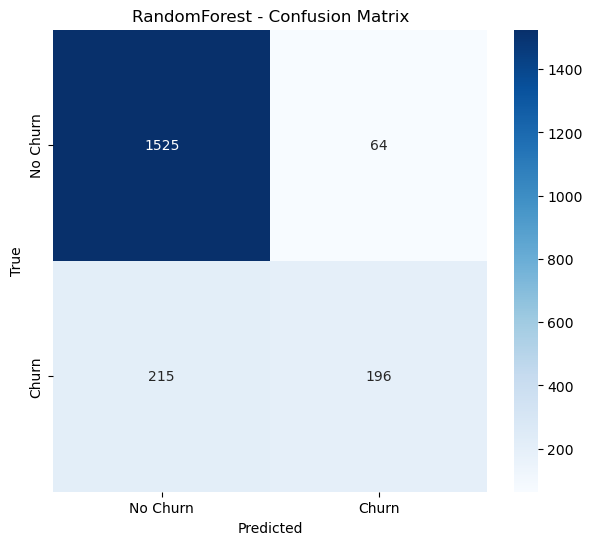

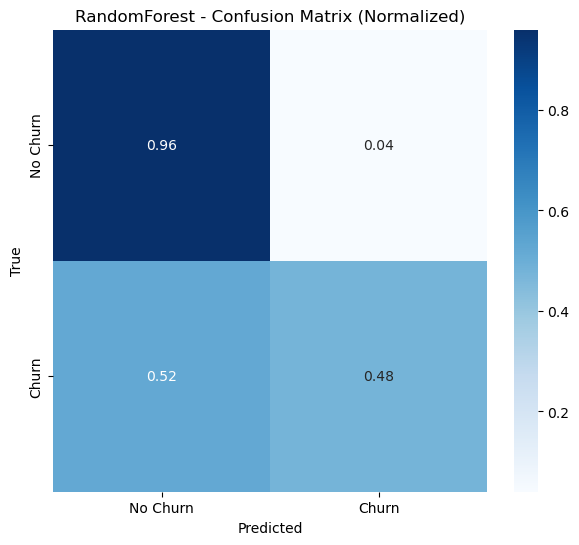

Accuracy Score Test: 0.8605
Accuracy Score Train: 1.0 (as comparison)



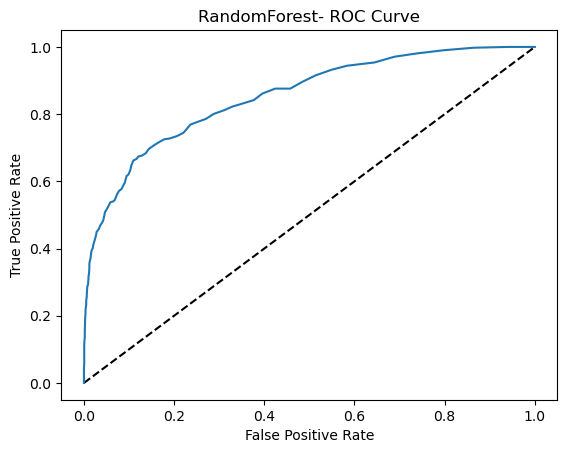

AUC Score (ROC): 0.8528776763607465



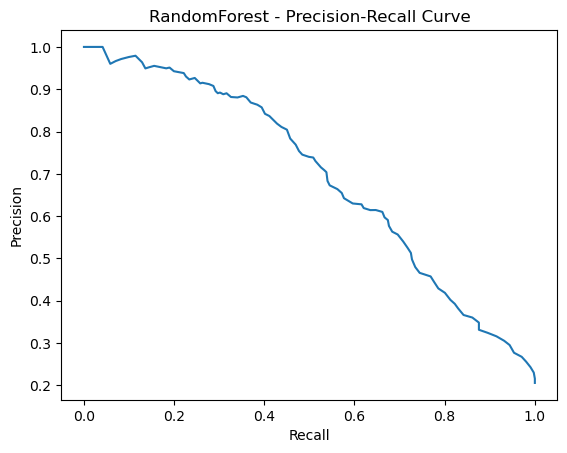

F1 Score: 0.5842026825633383 
AUC Score (PR): 0.6938304332730088



In [23]:
confusion_matrix_plot(X_train,y_train,X_test,y_test,rf,y_pred_rf,'RandomForest')

roc_curve_auc_score (X_test, y_test, y_pred_rf_prob, 'RandomForest')

precision_recall_curve_and_scores(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'RandomForest')


In [26]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {'n_estimators':np.arange(10,2000,10),
                'max_features': ['auto','sqrt'],
                'max_depth':np.arange(10,200,10),
                'criterion':['gini','entropy'],
                'bootstrap':[True,False]}

rf = RandomForestClassifier(max_features='sqrt')
rf_random_grid = RandomizedSearchCV(estimator=rf,param_distributions=param_grid_rf,cv=5,verbose=0)
rf_random_grid.fit(X_train,y_train)

y_pred_rf_tuned = rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)

print('Random Forest - Best Parameters: ',rf_random_grid.best_params_)

C:\Users\prana\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\prana\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\prana\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

Random Forest - Best Parameters:  {'n_estimators': 490, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'gini', 'bootstrap': True}


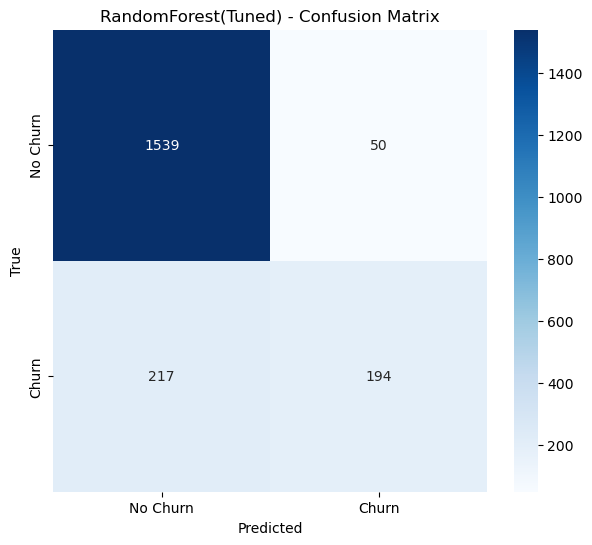

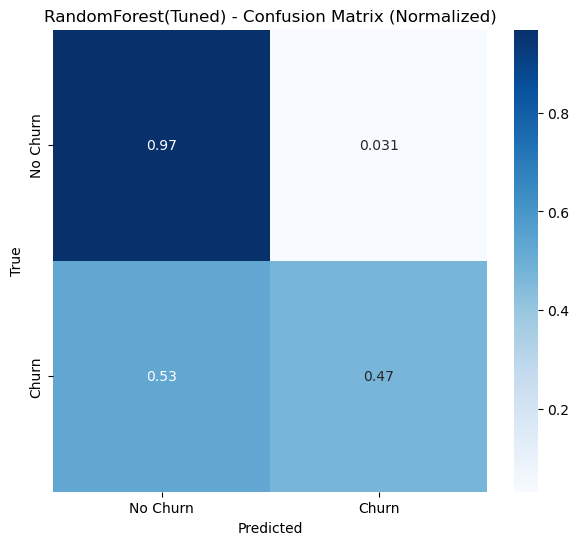

Accuracy Score Test: 0.8665
Accuracy Score Train: 1.0 (as comparison)



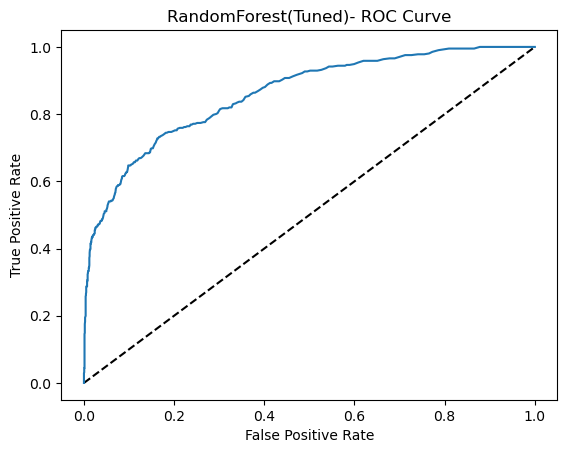

AUC Score (ROC): 0.8601187605174873



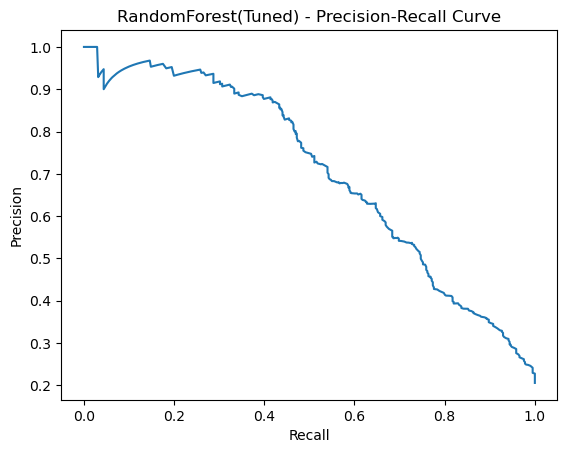

F1 Score: 0.5923664122137404 
AUC Score (PR): 0.7029298059334311



In [27]:
confusion_matrix_plot(X_train,y_train,X_test,y_test,rf_random_grid,y_pred_rf_tuned,'RandomForest(Tuned)')

roc_curve_auc_score (X_test, y_test, y_pred_rf_tuned_prob, 'RandomForest(Tuned)')

precision_recall_curve_and_scores(X_test, y_test, y_pred_rf_tuned, y_pred_rf_tuned_prob, 'RandomForest(Tuned)')


In [ ]:
df.head()

## Support Vector Machine 

In [24]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf' ,probability=True)
svm.fit(X_train,y_train)

y_pred_svm = svm.predict(X_test)
y_pred_svm_prob = svm.predict_proba(X_test)

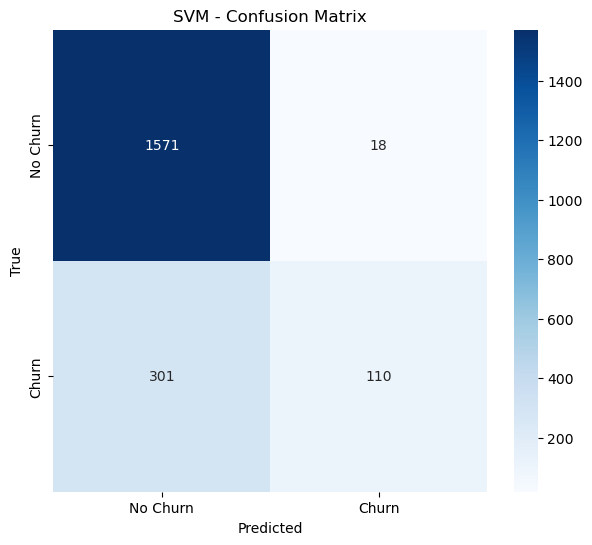

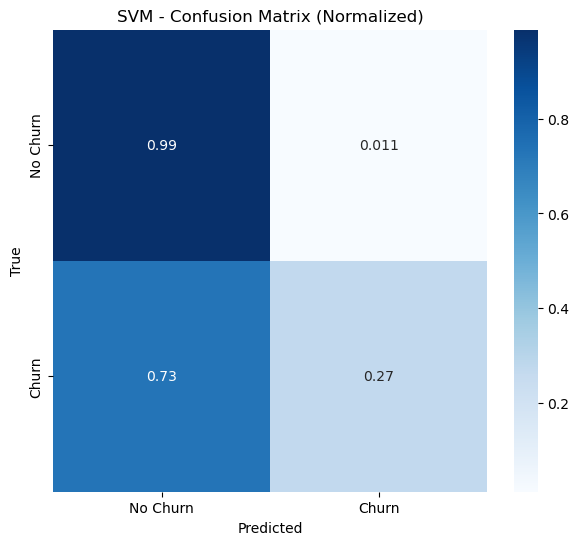

Accuracy Score Test: 0.8405
Accuracy Score Train: 0.84375 (as comparison)



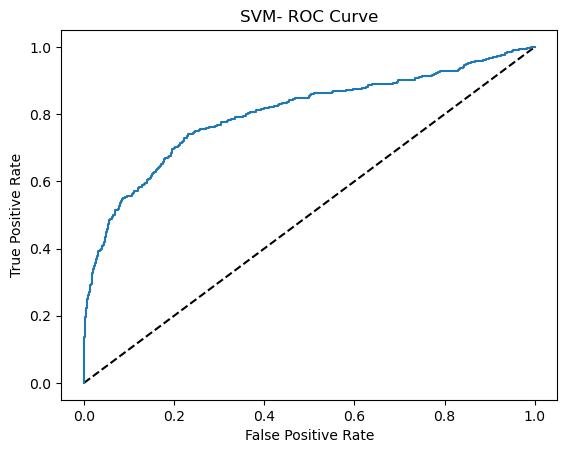

AUC Score (ROC): 0.8012323164578865



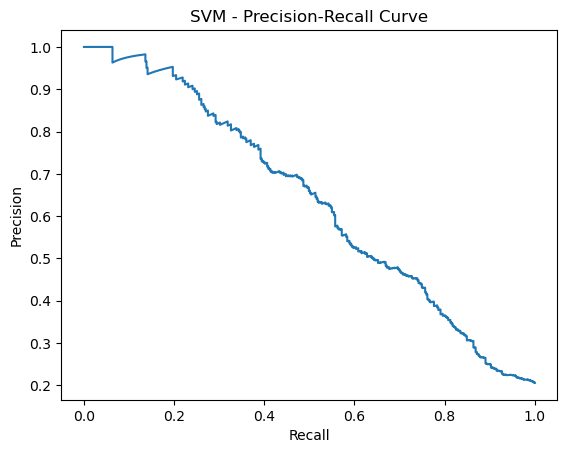

F1 Score: 0.4081632653061225 
AUC Score (PR): 0.6365825162264417



In [25]:
confusion_matrix_plot(X_train,y_train,X_test,y_test,svm,y_pred_svm,'SVM')

roc_curve_auc_score (X_test, y_test, y_pred_svm_prob, 'SVM')

precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')
